In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

## Since there was conflicting message on the homework 6 I have done the assigned dataset in this semester as a separate notebook and adding the link in the main homework notebook

## Conclusions:


- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

The data is very good and highly relevant. We needed to do data-wrangling before I started extracting features for m the email text I found the ata highly useful.

The correlation matrix shows that the extracted features word count, urgency , threat, financial terms  are having moderate correlation  for this kind of problem.There cases where unsafe emails have higher http count and more needs to be analyzed.

The dataset for the email phishing only had three column which one was the feature - email text and the other was target i.e. type. So as to analyse I had to use the NLTK library to parse the mails and create features from the data. The features that I created were

- 1   http_url_count

- 2   https_url_count

- 3   sentence_count

- 4   total_word_count

- 5   urgency_terms_count

- 6   account_terms_count

- 7   threat_terms_count

- 8   financial_terms_count

- 9   official_terms_count

The Dataset was not balanced and the analysis of the whole dataset gave me incrrect corelation. but when I created a balanced smaller data with 5)5 spam and non spam I got much better results. I was able to do analysis on a smaller dataset which was completing the analysis much quicker. I took help from ChatGPT and Google as I didnt work on NLTK before. I also researched on how spam email works and created my own workflow for the EDA.

### Do you see any outliers?  (Data points that are far from the rest of the data).)

The data is usable and any one should create a balanced dataset to do the analysis.

There are outliers in many of the columns and the same is evident from the box plot as there are circle(o) markers in many of the box plot which are outside the inter-quartile range. There extracted features  like frequency of use if account related word, threat related word or urgency related words. We did not notice a strong correlation that one single feature could identify a spam. It looks like it will be combination of features which we will need to use

### Are any data items highly correlated with each other, suggesting that they are redundant?

The sentence_count and total_word_count show a perfect correlation (greater than 0.9), indicating they are redundant features and we could drop one of them

### For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

For this dataset there was no such as the data was email text and didnt have the date


### Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

For this dataset only text and the target variable was provided so we we had to extract the dataset. The other two datasets could have confounding variables (Phishing website containing URL info) and ICSA Vulnerability could also bring in additional information that could be used as confounding variable



In [5]:
#import dataset file "web_page_dataset_phishing.csv" from folder./Phishing_data
path = './dataset/'
os.listdir(path)

#first open the two datasets related to phishing_website and phishing_email

df_phishing_website_data=pd.read_csv(path+'web_page_dataset_phishing.csv')
df_phishing_email_data=pd.read_csv(path+'phishing_email.csv')

In [6]:
df_phishing_email_data.describe()

,Unnamed: 0
count,18650.000000
mean,9325.154477
std,5384.327293
min,0.000000
25%,4662.250000
50%,9325.500000
75%,13987.750000
max,18650.000000


In [7]:
df_phishing_email_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


### lets look at the phishing_email_data


In [8]:
df_phishing_email_data.head(50)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [9]:
#check if Unnamed column is having the same value as the index
df_phishing_email_data['Unnamed: 0'].equals(df_phishing_email_data.index)

False

In [10]:
#check which rows have different values in Unnamed column compared toi Index
df_phishing_email_data[df_phishing_email_data['Unnamed: 0']!=df_phishing_email_data.index]


,Unnamed: 0,Email Text,Email Type
6444,6445,Dear Sir/MadamOur company is designer and manu...,Phishing Email
6445,6446,"synthetic compounds summary dear colleagues , ...",Safe Email
6446,6447,"R. A. Hettinga:\n>Church, AA, same diff?It's d...",Safe Email
6447,6448,"On Thu, 25 Jul 2002, Joseph S. Barrera III wro...",Safe Email
6448,6449,"fw : modified version lance , any comment ? vi...",Safe Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [11]:
#rename the column name "Email Text" to `text` and "Email Type" to `type`
df_phishing_email_data.rename(columns={'Email Text':'text','Email Type':'type'},inplace=True)

### by looking at the data it it seems the Unnamed column is more of a serial number or index but doesnt have any value. So we can drop it

In [12]:
#drop Unnamed column
df_phishing_email_data.drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
df_phishing_email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18634 non-null  object
 1   type    18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [14]:
#check the shape of the data
df_phishing_email_data.shape

(18650, 2)

### since there is only one feature and the other is the target(type) so let us extract some information from email text that we can then use as features and then we can analyze the data.

based on the research on internet we understand that typically spam emails have call to action words and inorder to steal information it may direct people websites which are then used to steal information. So we will extract sentence count in each email, the word count in each email after dropping the stop words. We will then analyze the type of emails which are of type phishing email and identify the call to action words, we will identify if the email has links to URLs with https and without https .  We will do a word cloud of the email text for the spams and create a list of such words and then see the count of such words in spam and non spam emails. I also researched to see the NLTK library people are referreing to is punkt so I will use that

In [15]:
#lets get the value counts of the type of emails
df_phishing_email_data['type'].value_counts()

type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [16]:
df = df_phishing_email_data.copy()

In [17]:
df.describe()


,text,type
count,18634,18650
unique,17537,2
top,empty,Safe Email
freq,533,11322


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18634 non-null  object
 1   type    18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [19]:
# Convert the type column from text (Dtype = object to int and we will use the the first word (Safe = 0, Phishing = 1) as there could be spaces

df['type'] = df['type'].apply(lambda x: 1 if x.split()[0] == 'Phishing' else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18634 non-null  object
 1   type    18650 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 291.5+ KB


In [20]:
df['type'].value_counts()

type
0    11322
1     7328
Name: count, dtype: int64

In [21]:
#let us check if the text has only space or empty
df[df['text'].isnull()].count()


text     0
type    16
dtype: int64

In [22]:
#let us check if the text has only space or empty


df[df['text'].isnull()]

,text,type
31,NaN,1
387,NaN,1
1883,NaN,1
2049,NaN,1
2451,NaN,1
2972,NaN,1
3627,NaN,1
3806,NaN,1
5763,NaN,1
6299,NaN,1


#### Lets remove blank emails or email with only spaces

In [23]:
# first, let's check the initial number of rows
print("Initial number of rows:", len(df))

# remove rows where text is empty or contains only whitespace
df = df[df['text'].str.strip().str.len() > 0]

# check the final number of rows
print("Number of rows after cleaning:", len(df))

Initial number of rows: 18650
Number of rows after cleaning: 18631


In [24]:
df.shape

(18631, 2)

#### So there were 19 such rows which got removed

In [25]:
df[df['text'].isnull()]

,text,type


In [26]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18631 entries, 0 to 18630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18631 non-null  object
 1   type    18631 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 291.2+ KB


In [27]:
# lets see if there are any http url in the email or https url. We will use regular expression and took help from the internet for the rules for the https and HTTPS pattern. Took help from chatgpt to understand how to use it

import re
def count_urls(text):
    """
    Counts HTTP and HTTPS URLs in a given text.

    Parameters:
    text (str): Input text to analyze

    Returns:
    tuple: Count of (HTTP URLs, HTTPS URLs)
    """
    try:
        # Pattern for matching http:// and https:// URLs
        http_pattern = r'http://[^\s<>"\']+'
        https_pattern = r'https://[^\s<>"\']+'

        # Count occurrences
        http_count = len(re.findall(http_pattern, str(text)))
        https_count = len(re.findall(https_pattern, str(text)))

        return http_count, https_count
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return 0, 0

# Apply the function to the DataFrame
df[['http_url_count', 'https_url_count']] = (
    df['text'].apply(count_urls).apply(pd.Series)
)

In [28]:
import nltk
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stop words

# Import the specific functions you want to use
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/debasishhalder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/debasishhalder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#lets count the sentences in each of the emails using NLTK sentence tokenizer. Took help from chatgpt to understand how to use it
#import nltk
#from nltk.tokenize import sent_tokenize
def count_sentences(text):
    """
    Counts the number of sentences in a given text using NLTK's sentence tokenizer.

    Parameters:
    text (str): Input text to analyze

    Returns:
    int: Number of sentences in the text
    """
    try:
        # Handle potential null values
        text_str = str(text)

        # Tokenize the text into sentences
        sentences = sent_tokenize(text_str)
        return len(sentences)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return 0

In [30]:

# apply the function to create a new column sentence_count
df['sentence_count'] = df['text'].apply(count_sentences)

# Display summary statistics
print("Sentence count statistics:")
print(df['sentence_count'].describe())

Sentence count statistics:
count     18631.000000
mean         32.229188
std        1636.333244
min           1.000000
25%           5.000000
50%           9.000000
75%          19.000000
max      223247.000000
Name: sentence_count, dtype: float64


In [31]:
# let us remove common stop words from the text before we count the words. Took help from chatgpt to understand how to use it
def remove_common_stopwords(text):
    #  standard English stop words
    stop_words = set(stopwords.words('english'))

    # add common email-specific stop words
    email_stop_words = {
        'subject', 'from', 'to', 'cc', 'bcc', 'sent', 'received',
        'date', 'time', 'regards', 'dear', 'sincerely', 'best',
        'thanks', 'thank', 'you', 'yours', 'truly', 'hi', 'hello'
    }

    # combine both stop word sets
    stop_words.update(email_stop_words)

    # tokenize and remove stop words
    word_tokens = word_tokenize(text)
    filtered_text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])

    return filtered_text

# apply the function to the  DataFrame and replace the text column with the cleaned text
df['text'] = df['text'].apply(remove_common_stopwords)


In [32]:
#lets analyze the text and come up with word count and urgency count, account related words Financial incentive word, credentialrelated, and threat
def analyze_text_metrics(text):

    # convert text to lowercase and handle potential null values
    text_str = str(text).lower()

    # Calculate total word count
    total_words = len(text_str.split())

    # Define term categories
    urgency_terms = {
        'urgent', 'immediate', 'immediately', 'action required', 'attention required', 'respond now',
        'expires', 'expiring', 'deadline', 'limited time', 'act now', 'urgent action', 'click',
        'here', 'now', 'free', 'offer', 'buy', 'purchase', 'donate', 'subscribe', 'register',
        'sign up', 'get started', 'learn more'
    }

    account_terms = {
        'verify', 'verification', 'authenticate', 'confirm', 'validate', 'reactivate',
        'suspended', 'blocked', 'restricted', 'limited', 'unlock', 'secure', 'security',
        'access', 'password', 'login', 'account', 'username', 'credential'
    }

    threat_terms = {
        'terminate', 'deactivate', 'delete', 'removal', 'suspend', 'restriction',
        'warning', 'risk', 'compromised', 'suspicious', 'unauthorized', 'disabled',
        'cancelled', 'violation', 'breach', 'illegal'
    }

    financial_terms = {
        'claim', 'prize', 'winner', 'won', 'reward', 'bonus', 'payment', 'refund',
        'deposit', 'transfer', 'transaction', 'million', 'inheritance', 'lottery',
        'cash', 'credit', 'bank', 'money', 'fund', 'balance'
    }

    official_terms = {
        'official', 'authorized', 'authentication', 'notification', 'notice', 'alert',
        'department', 'administration', 'support', 'service', 'helpdesk'
    }

    # Create dictionary with all counts
    metrics = {
        'total_word_count': total_words,
        'urgency_terms_count': sum(term in text_str for term in urgency_terms),
        'account_terms_count': sum(term in text_str for term in account_terms),
        'threat_terms_count': sum(term in text_str for term in threat_terms),
        'financial_terms_count': sum(term in text_str for term in financial_terms),
        'official_terms_count': sum(term in text_str for term in official_terms)
    }

    return metrics

# Apply the function to the DataFrame and expand the dictionary to columns
df = pd.concat([
    df,
    df['text'].apply(analyze_text_metrics).apply(pd.Series)
], axis=1)


In [33]:
df

,text,type,http_url_count,https_url_count,sentence_count,total_word_count,urgency_terms_count,account_terms_count,threat_terms_count,financial_terms_count,official_terms_count
0,": 6 . 1100 , disc : uniformitarianism , : 1086...",0,0,0,10,144,1,0,0,0,0
1,side * galicismos * * galicismo * spanish term...,0,0,0,7,58,0,0,0,0,0
2,: equistar deal tickets still available assist...,0,0,0,8,231,2,0,0,0,0
3,"hot lil horny toy . one dream , open minded pe...",1,1,0,8,66,1,0,0,0,0
4,software incredibly low prices ( 86 % lower ) ...,1,0,0,13,85,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18626,lonely housewife always wanted lonely housewif...,1,0,0,7,31,0,0,0,0,0
18627,request submitted : access request anita . dup...,0,0,0,9,84,1,1,0,0,0
18628,": important - prc mtg dorn & john , discovered...",0,0,0,13,141,0,0,0,1,1
18629,press clippings - letter californian utilities...,0,0,0,1,29,0,0,0,0,0


In [34]:
df.head()

,text,type,http_url_count,https_url_count,sentence_count,total_word_count,urgency_terms_count,account_terms_count,threat_terms_count,financial_terms_count,official_terms_count
0,": 6 . 1100 , disc : uniformitarianism , : 1086...",0,0,0,10,144,1,0,0,0,0
1,side * galicismos * * galicismo * spanish term...,0,0,0,7,58,0,0,0,0,0
2,: equistar deal tickets still available assist...,0,0,0,8,231,2,0,0,0,0
3,"hot lil horny toy . one dream , open minded pe...",1,1,0,8,66,1,0,0,0,0
4,software incredibly low prices ( 86 % lower ) ...,1,0,0,13,85,0,0,0,0,0


#### We may use  the original text  to do any sentiment analysis but right now I am dropping the text columns and that way I will have only integer column and the target column ie type



In [35]:
df.drop(columns=['text'], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18631 entries, 0 to 18630
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   type                   18631 non-null  int64
 1   http_url_count         18631 non-null  int64
 2   https_url_count        18631 non-null  int64
 3   sentence_count         18631 non-null  int64
 4   total_word_count       18631 non-null  int64
 5   urgency_terms_count    18631 non-null  int64
 6   account_terms_count    18631 non-null  int64
 7   threat_terms_count     18631 non-null  int64
 8   financial_terms_count  18631 non-null  int64
 9   official_terms_count   18631 non-null  int64
dtypes: int64(10)
memory usage: 1.4 MB


In [37]:
df.shape

(18631, 10)

In [38]:
def perform_univariate_analysis(df):

    # calculate number of rows and columns for subplots
    n_features = len(df.columns)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols

    # create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    fig.suptitle('Univariate Analysis of Features', fontsize=16, y=1.02)

    # flatten axes array for easier iteration
    axes = axes.flatten()

    #create histograms and KDE plots for each feature
    for idx, column in enumerate(df.columns):
        # Histogram with KDE
        sns.histplot(data=df, x=column, hue='type', multiple="stack",
                    kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {column}')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Count')

    # remove empty subplots if any
    for idx in range(len(df.columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

In [39]:
# Method to do bivariate analysis

def perform_bivariate_analysis(df):
      # create correlation Matrix
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True)
    plt.title('Correlation Matrix of Features')
    plt.tight_layout()
    plt.show()

    # pairplot with KDE
    print("generating pairplot ...")
    sns.pairplot(df, hue='type', diag_kind='kde')
    plt.show()

    # violin plots
    features = [col for col in df.columns if col != 'type']
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    fig.suptitle('Violin Plots by Type', fontsize=16, y=1.02)
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        sns.violinplot(data=df, x='type', y=feature, ax=axes[idx])
        axes[idx].set_title(f'{feature} by Type')

    # remove empty subplots
    for idx in range(len(features), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

    # generate box plots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    fig.suptitle('Box Plots by Type', fontsize=16, y=1.02)
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        sns.boxplot(data=df, x='type', y=feature, ax=axes[idx])
        axes[idx].set_title(f'{feature} by Type')

    # Remove empty subplots
    for idx in range(len(features), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

In [40]:
def perform_kde_analysis(df):
    features = [col for col in df.columns if col != 'type']
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    fig.suptitle('KDE Plots by Feature', fontsize=16, y=1.02)
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        sns.kdeplot(data=df, x=feature, hue='type', ax=axes[idx])
        axes[idx].set_title(f'KDE Plot of {feature}')

    # Remove empty subplots
    for idx in range(len(features), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

In [41]:
df.head()

,type,http_url_count,https_url_count,sentence_count,total_word_count,urgency_terms_count,account_terms_count,threat_terms_count,financial_terms_count,official_terms_count
0,0,0,0,10,144,1,0,0,0,0
1,0,0,0,7,58,0,0,0,0,0
2,0,0,0,8,231,2,0,0,0,0
3,1,1,0,8,66,1,0,0,0,0
4,1,0,0,13,85,0,0,0,0,0


In [42]:
def analyze_phishing_email_Univariate_data(df):

    print("Performing Univariate Analysis...")
    perform_univariate_analysis(df)


In [43]:
def analyze_phishing_email_Bivariate_data(df):

    print("\nPerforming KDE Analysis...")
    perform_kde_analysis(df)

    print("\nPerforming Bivariate Analysis...")
    perform_bivariate_analysis(df)



In [44]:
# Create a random sample of 1000 rows while maintaining class balance
def create_balanced_sample(df, sample_size=1000, random_state=42):
    # calculate the number of samples needed from each class
    samples_per_class = sample_size // 2

    # split the data by class
    spam = df[df['type'] == 1]
    non_spam = df[df['type'] == 0]

    # sample equally from each class
    spam_sample = spam.sample(n=samples_per_class, random_state=random_state)
    non_spam_sample = non_spam.sample(n=samples_per_class, random_state=random_state)

    # combine the samples
    balanced_sample = pd.concat([spam_sample, non_spam_sample])

    # chuffle the combined sample
    balanced_sample = balanced_sample.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return balanced_sample

# create the balanced sample
sampled_phishing_email_df = create_balanced_sample(df, sample_size= 1500, random_state=39)

# verify the sample
print("Original dataset shape:", df.shape)
print("Sampled dataset shape:", sampled_phishing_email_df.shape)
print("\nClass distribution in sample:")
print(sampled_phishing_email_df['type'].value_counts())



Original dataset shape: (18631, 10)
Sampled dataset shape: (1500, 10)

Class distribution in sample:
type
0    750
1    750
Name: count, dtype: int64


Performing Univariate Analysis...


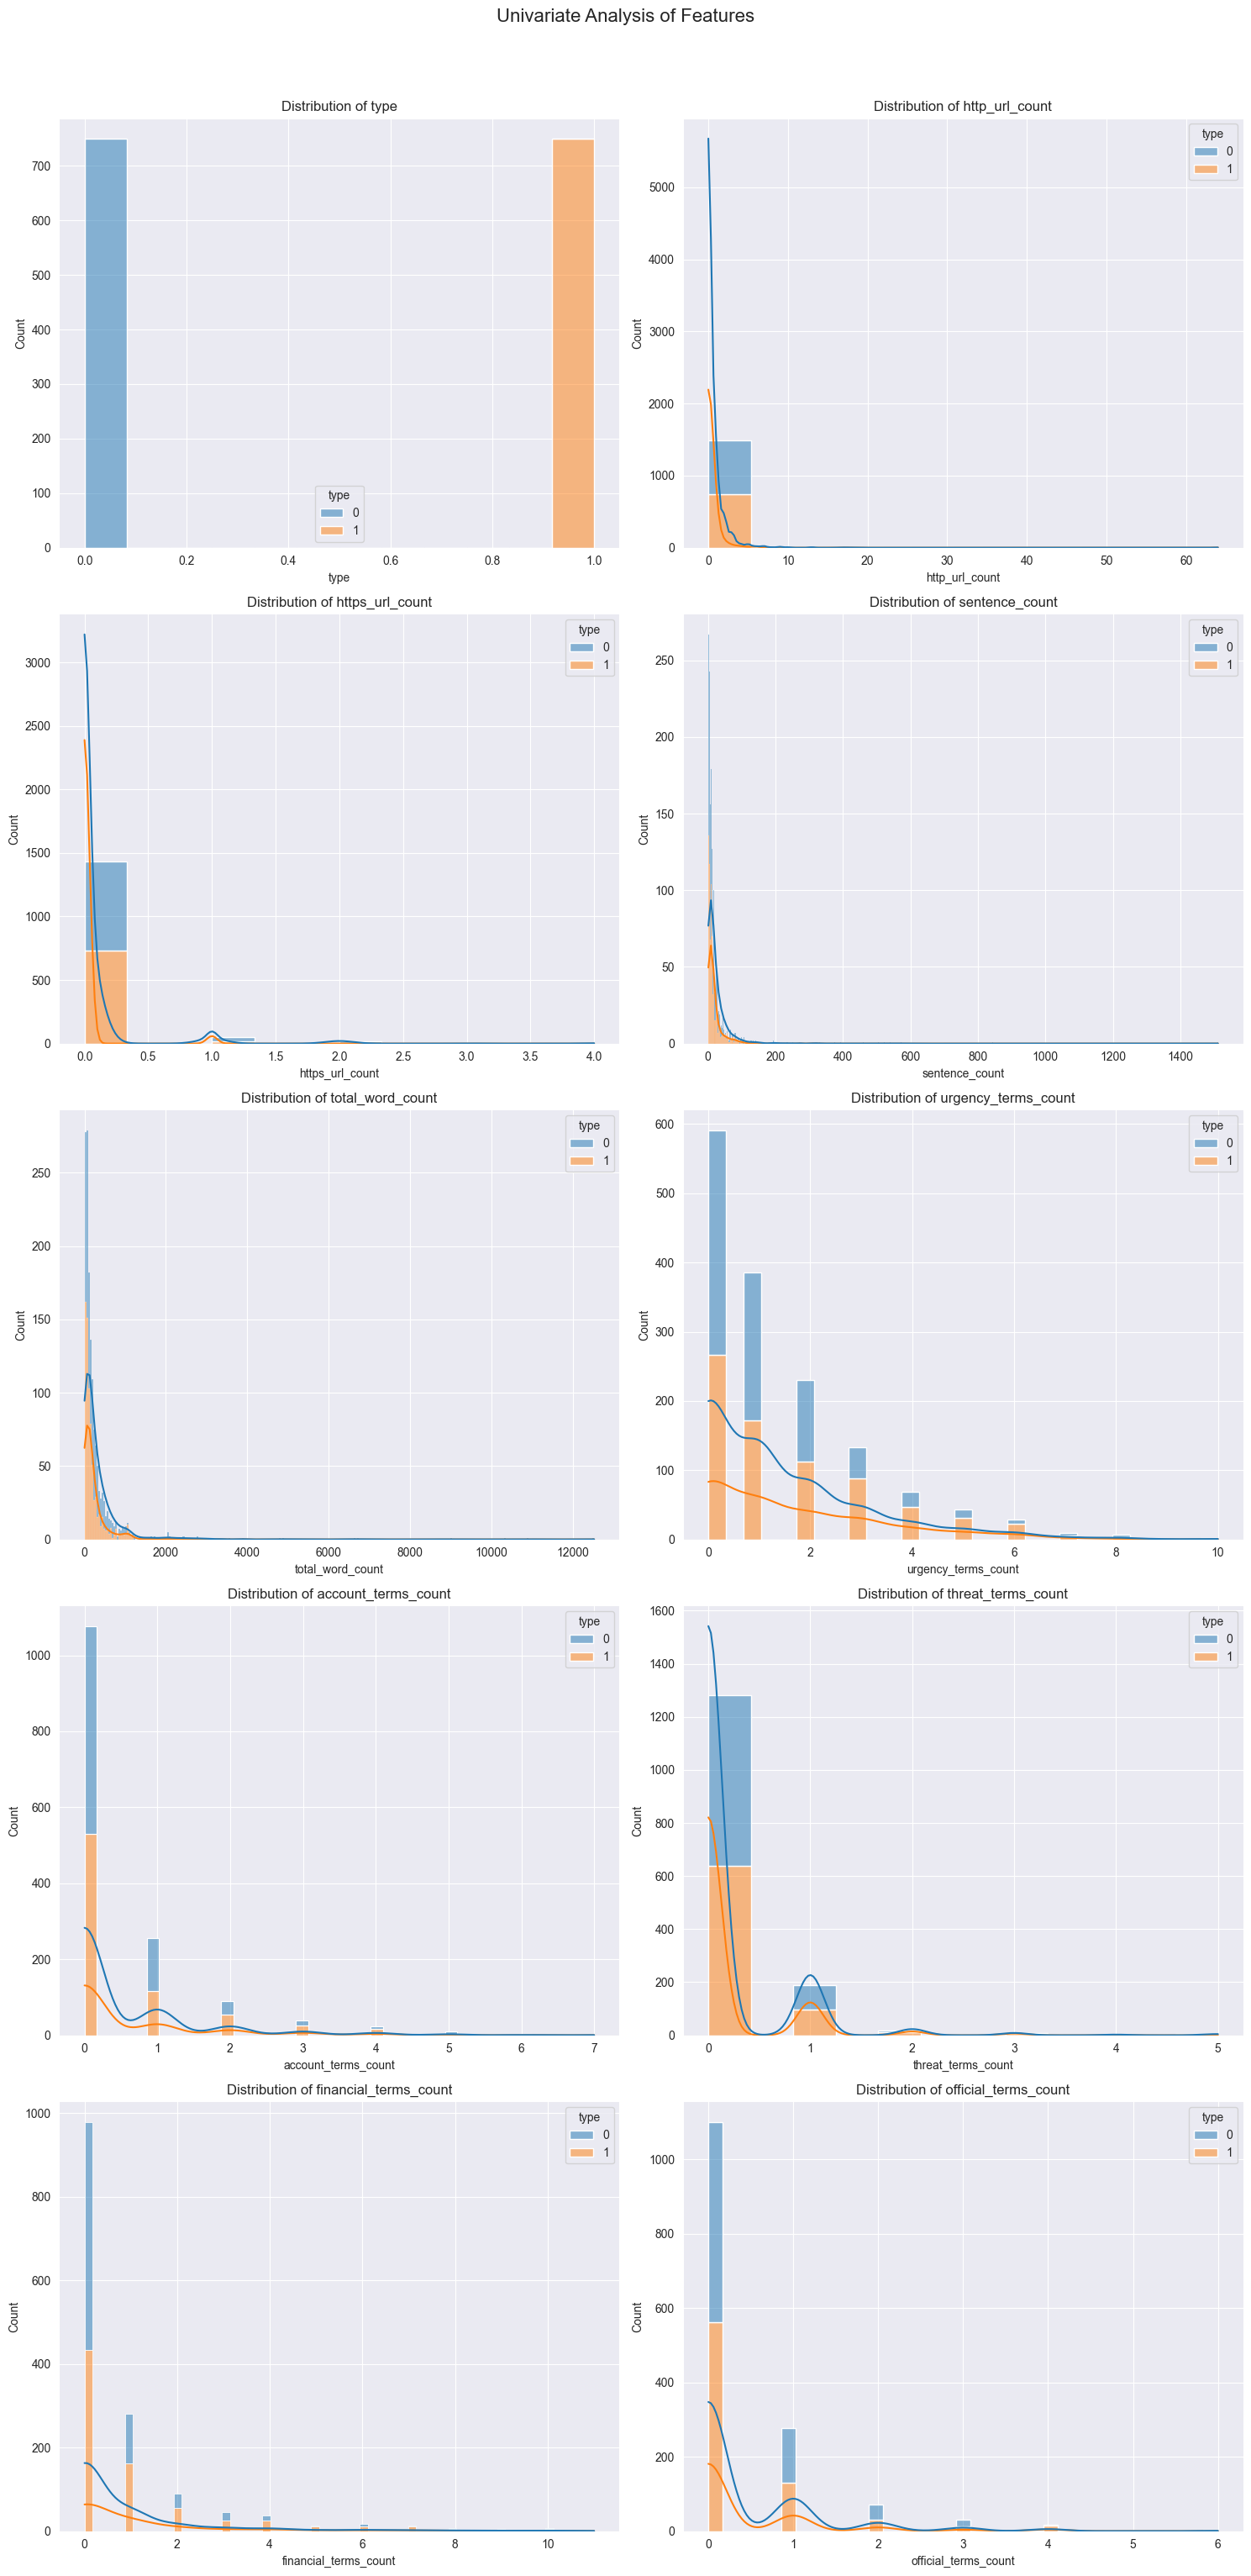

In [45]:
#generate the graphs for Univariate analysis for the whole then use df but we will use sample
analyze_phishing_email_Univariate_data(sampled_phishing_email_df)


Performing KDE Analysis...


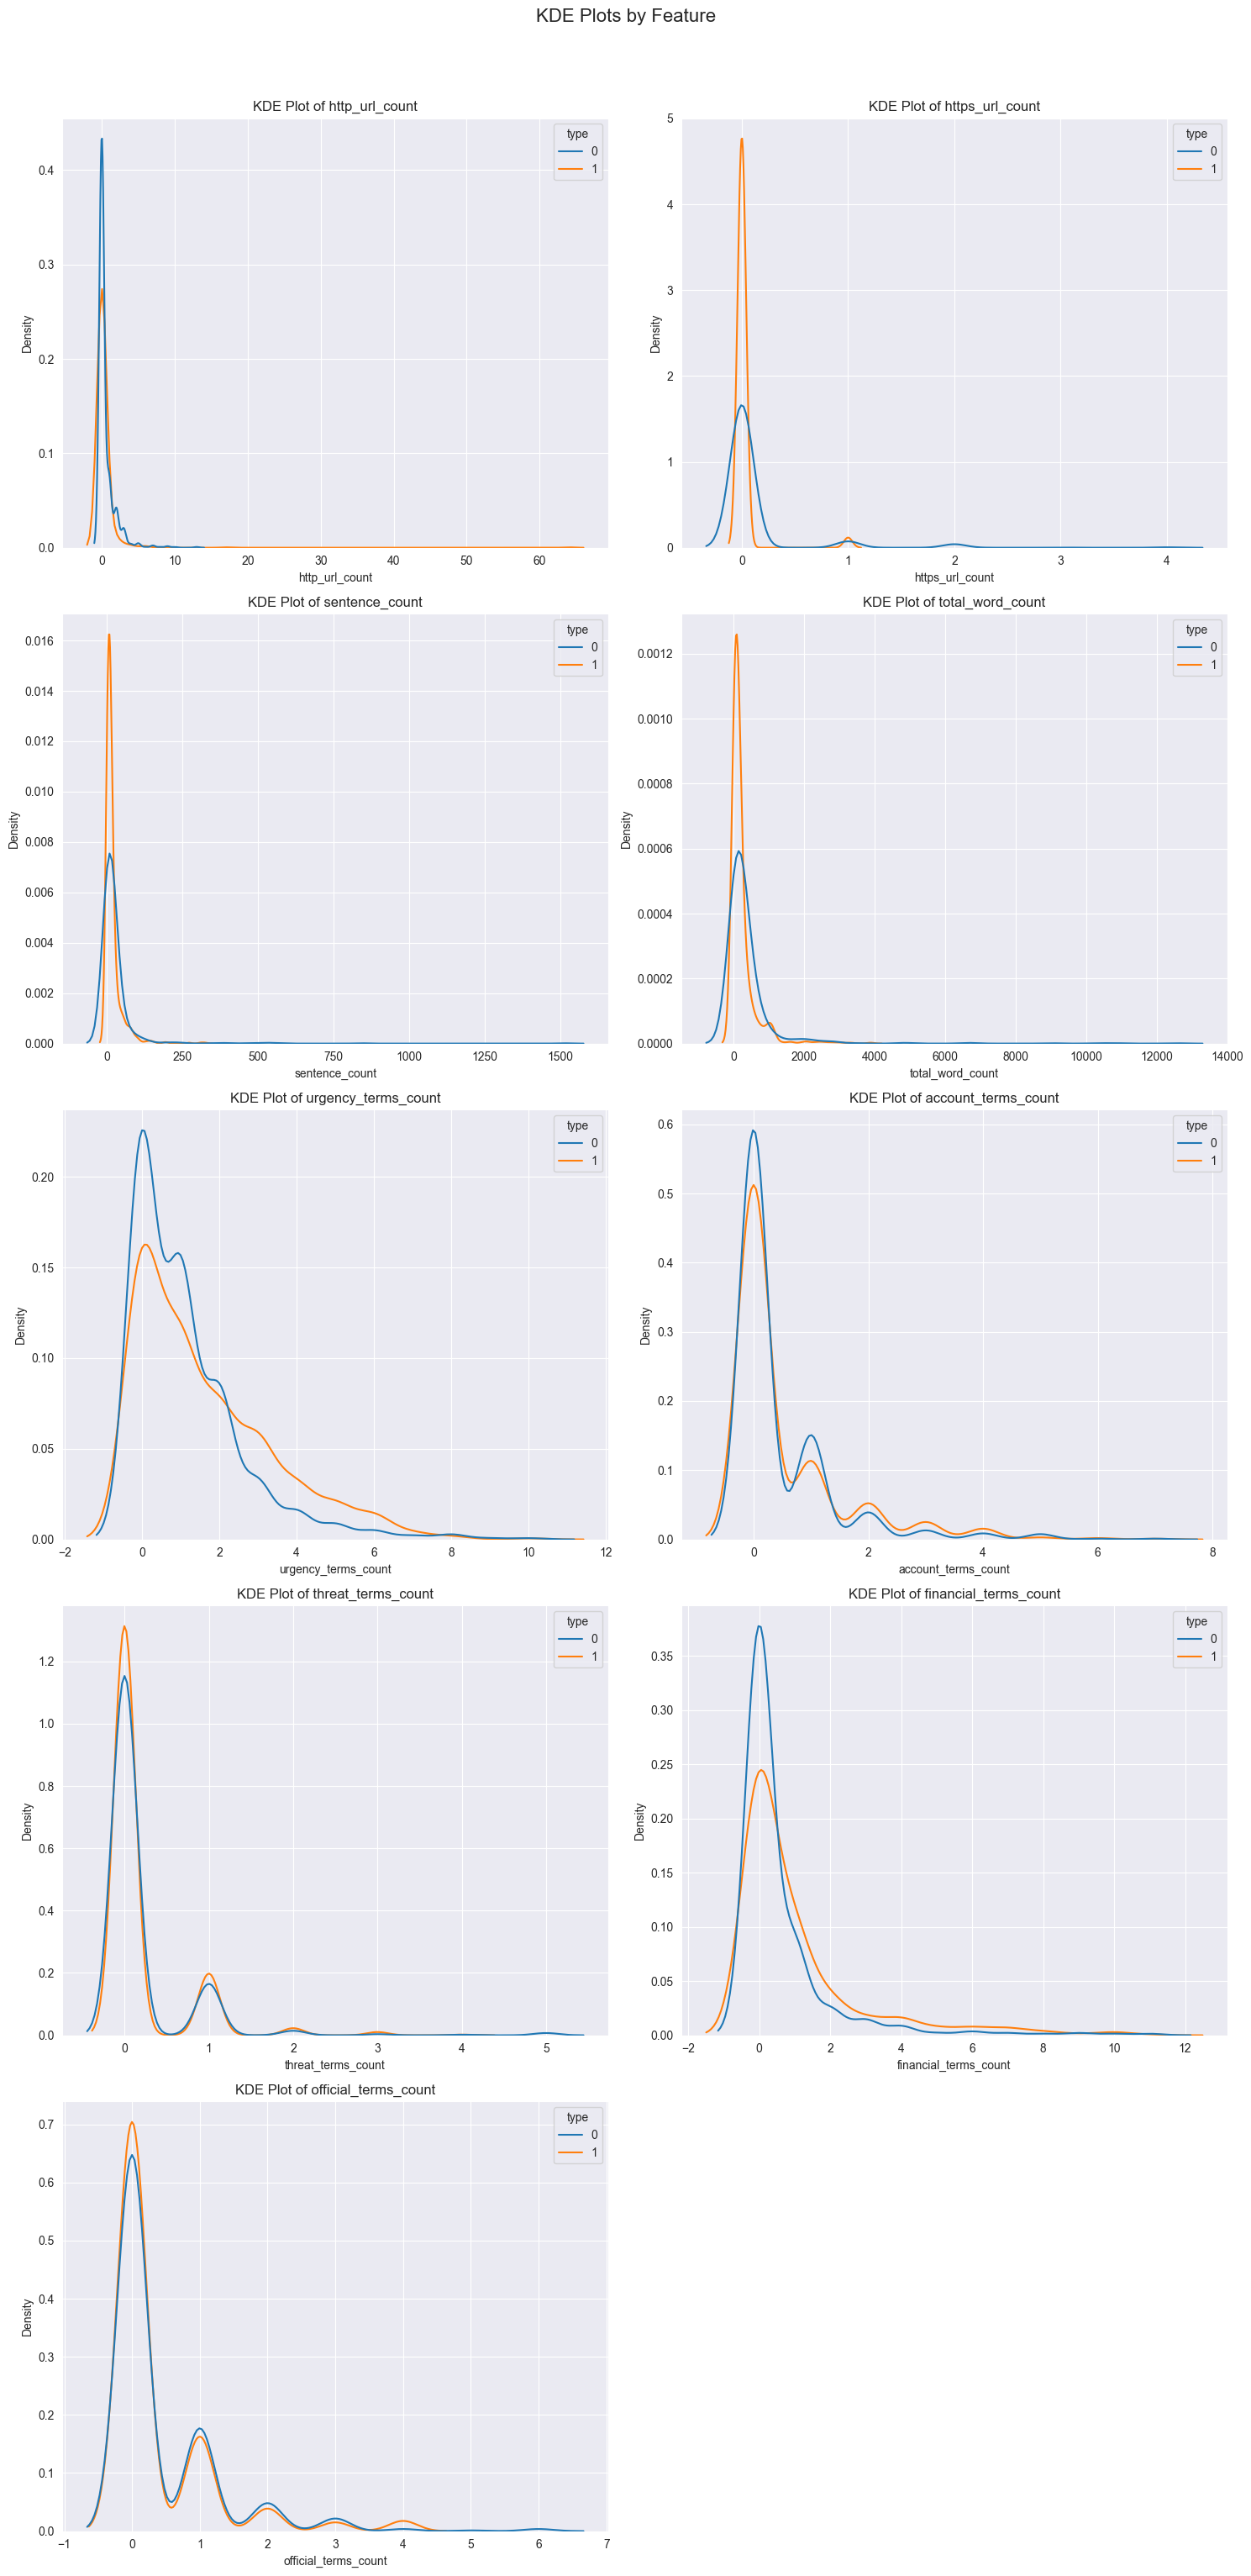


Performing Bivariate Analysis...


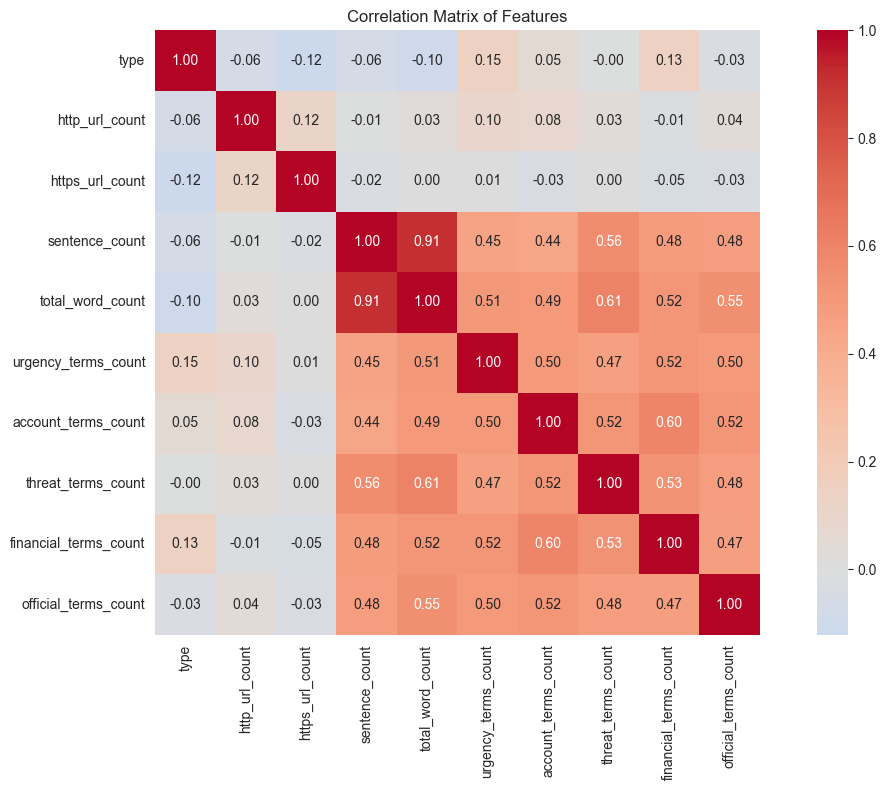

generating pairplot ...


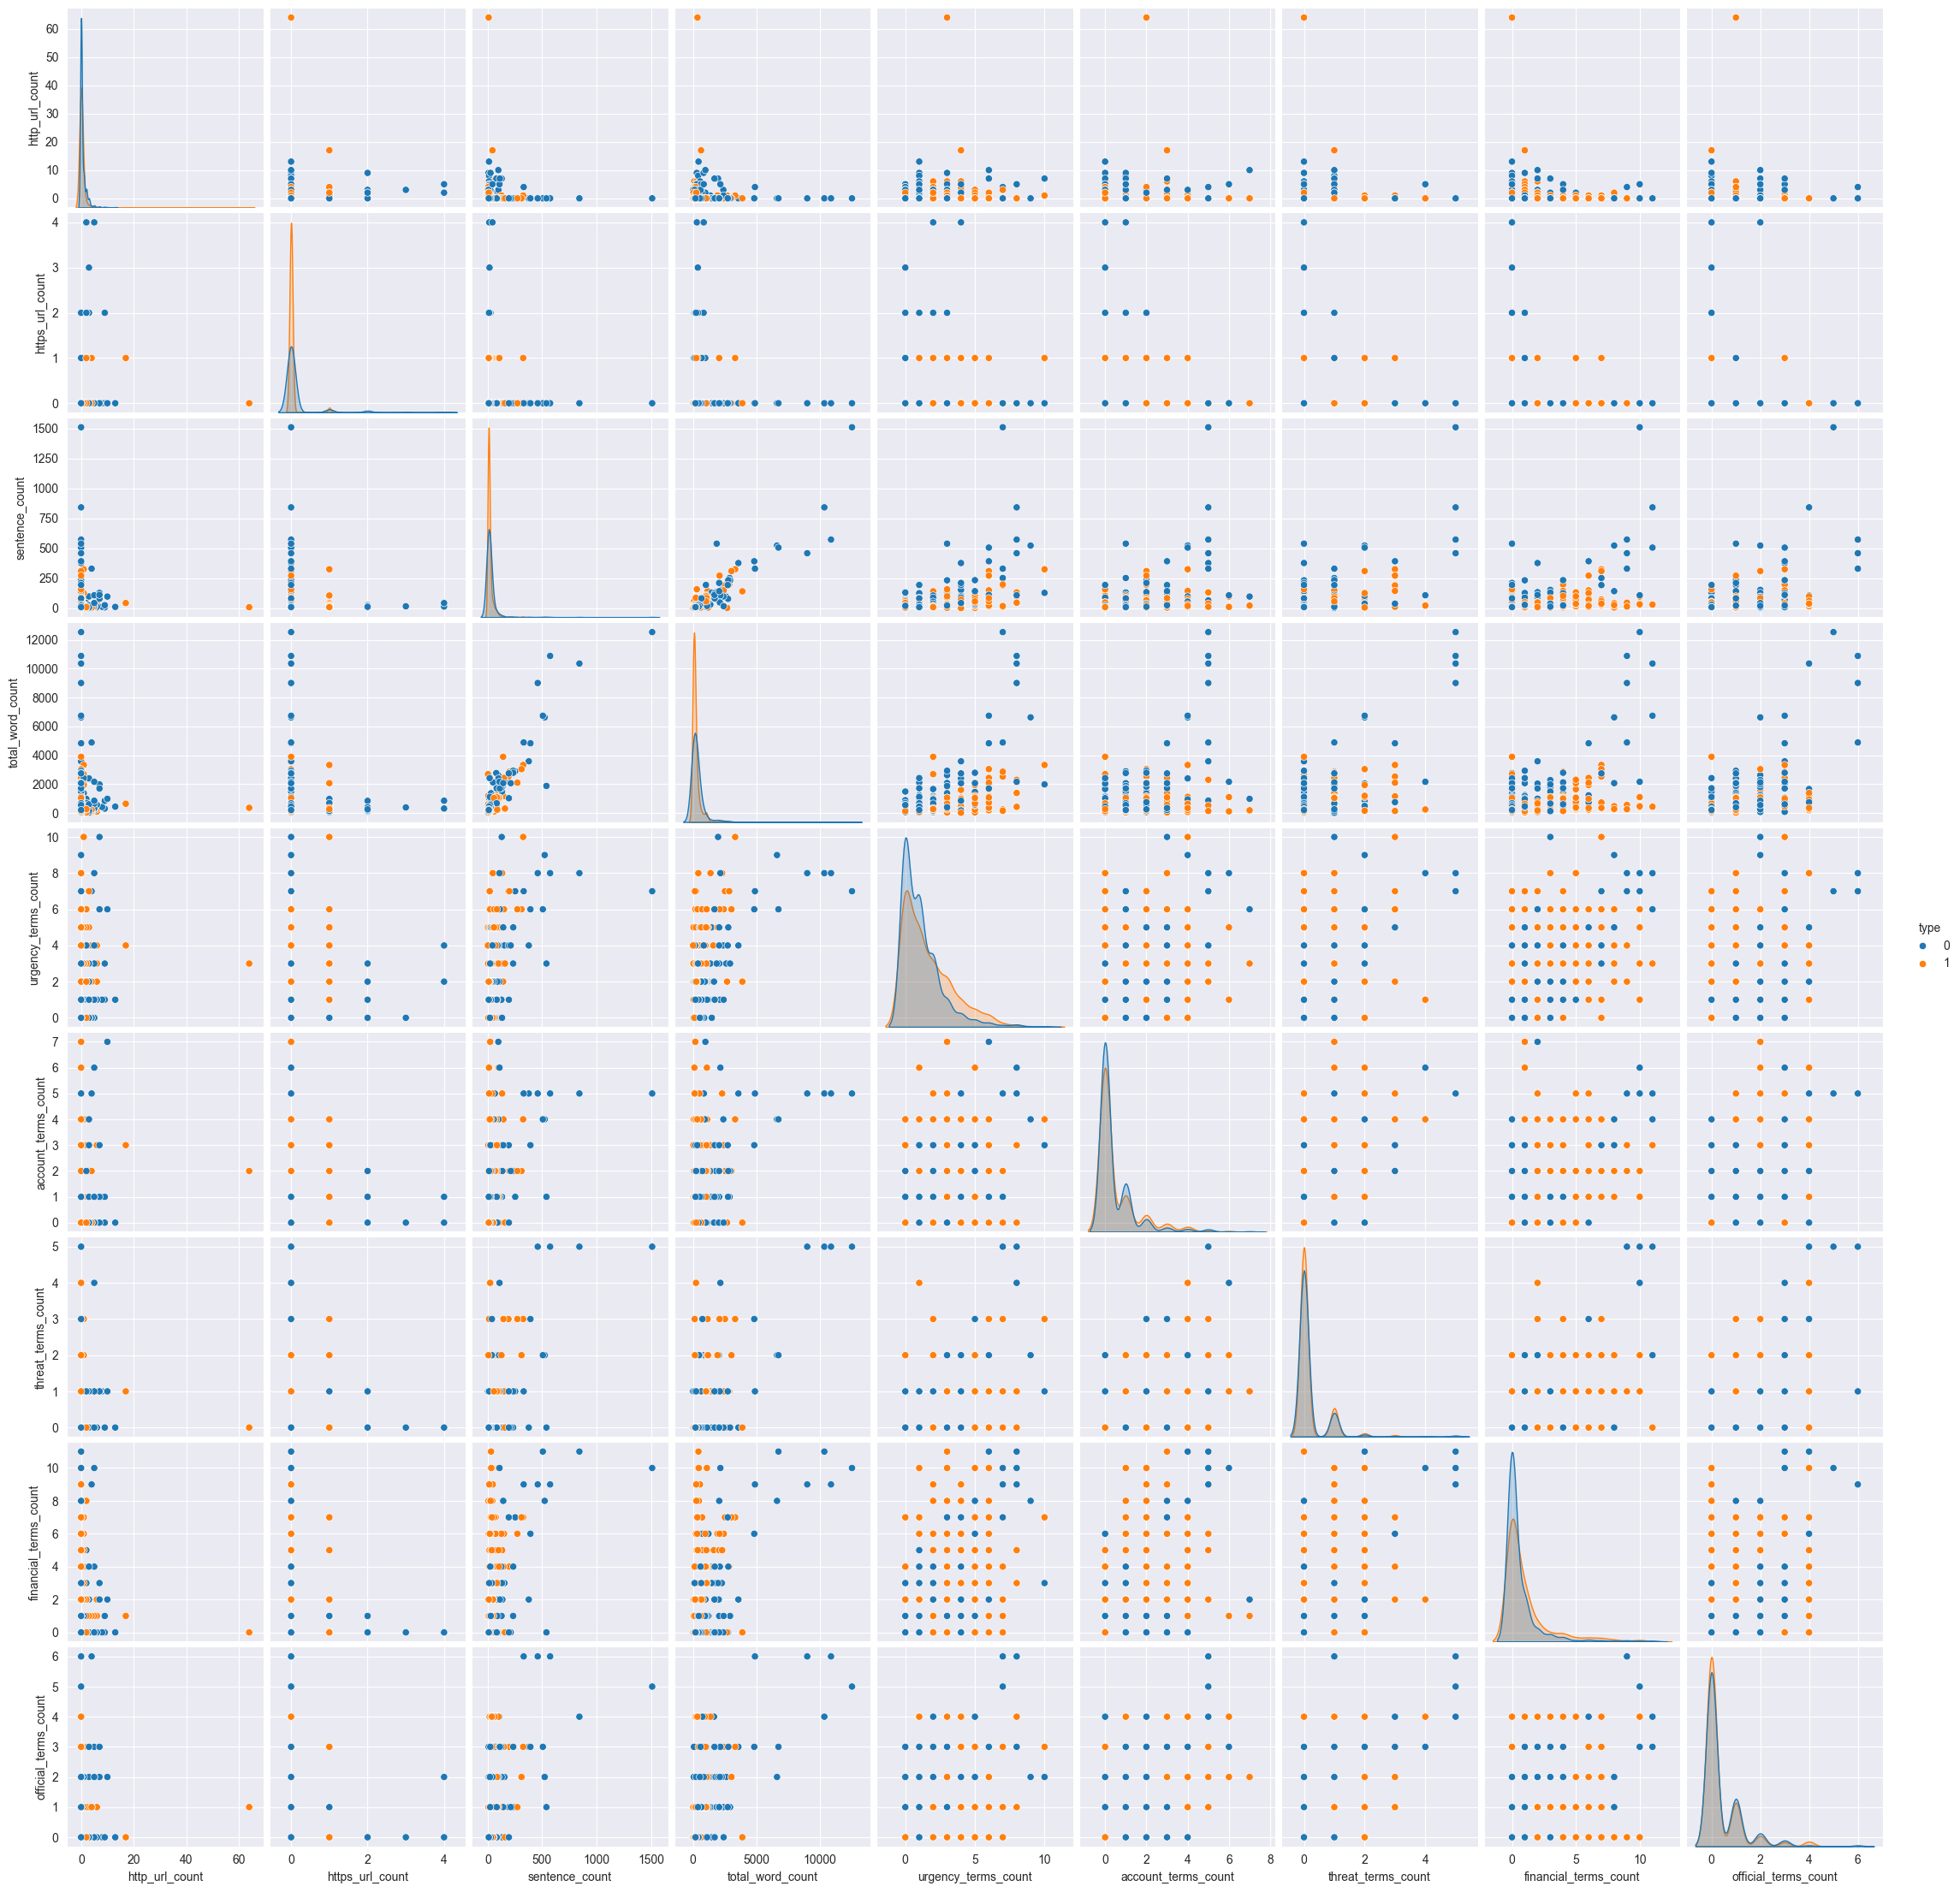

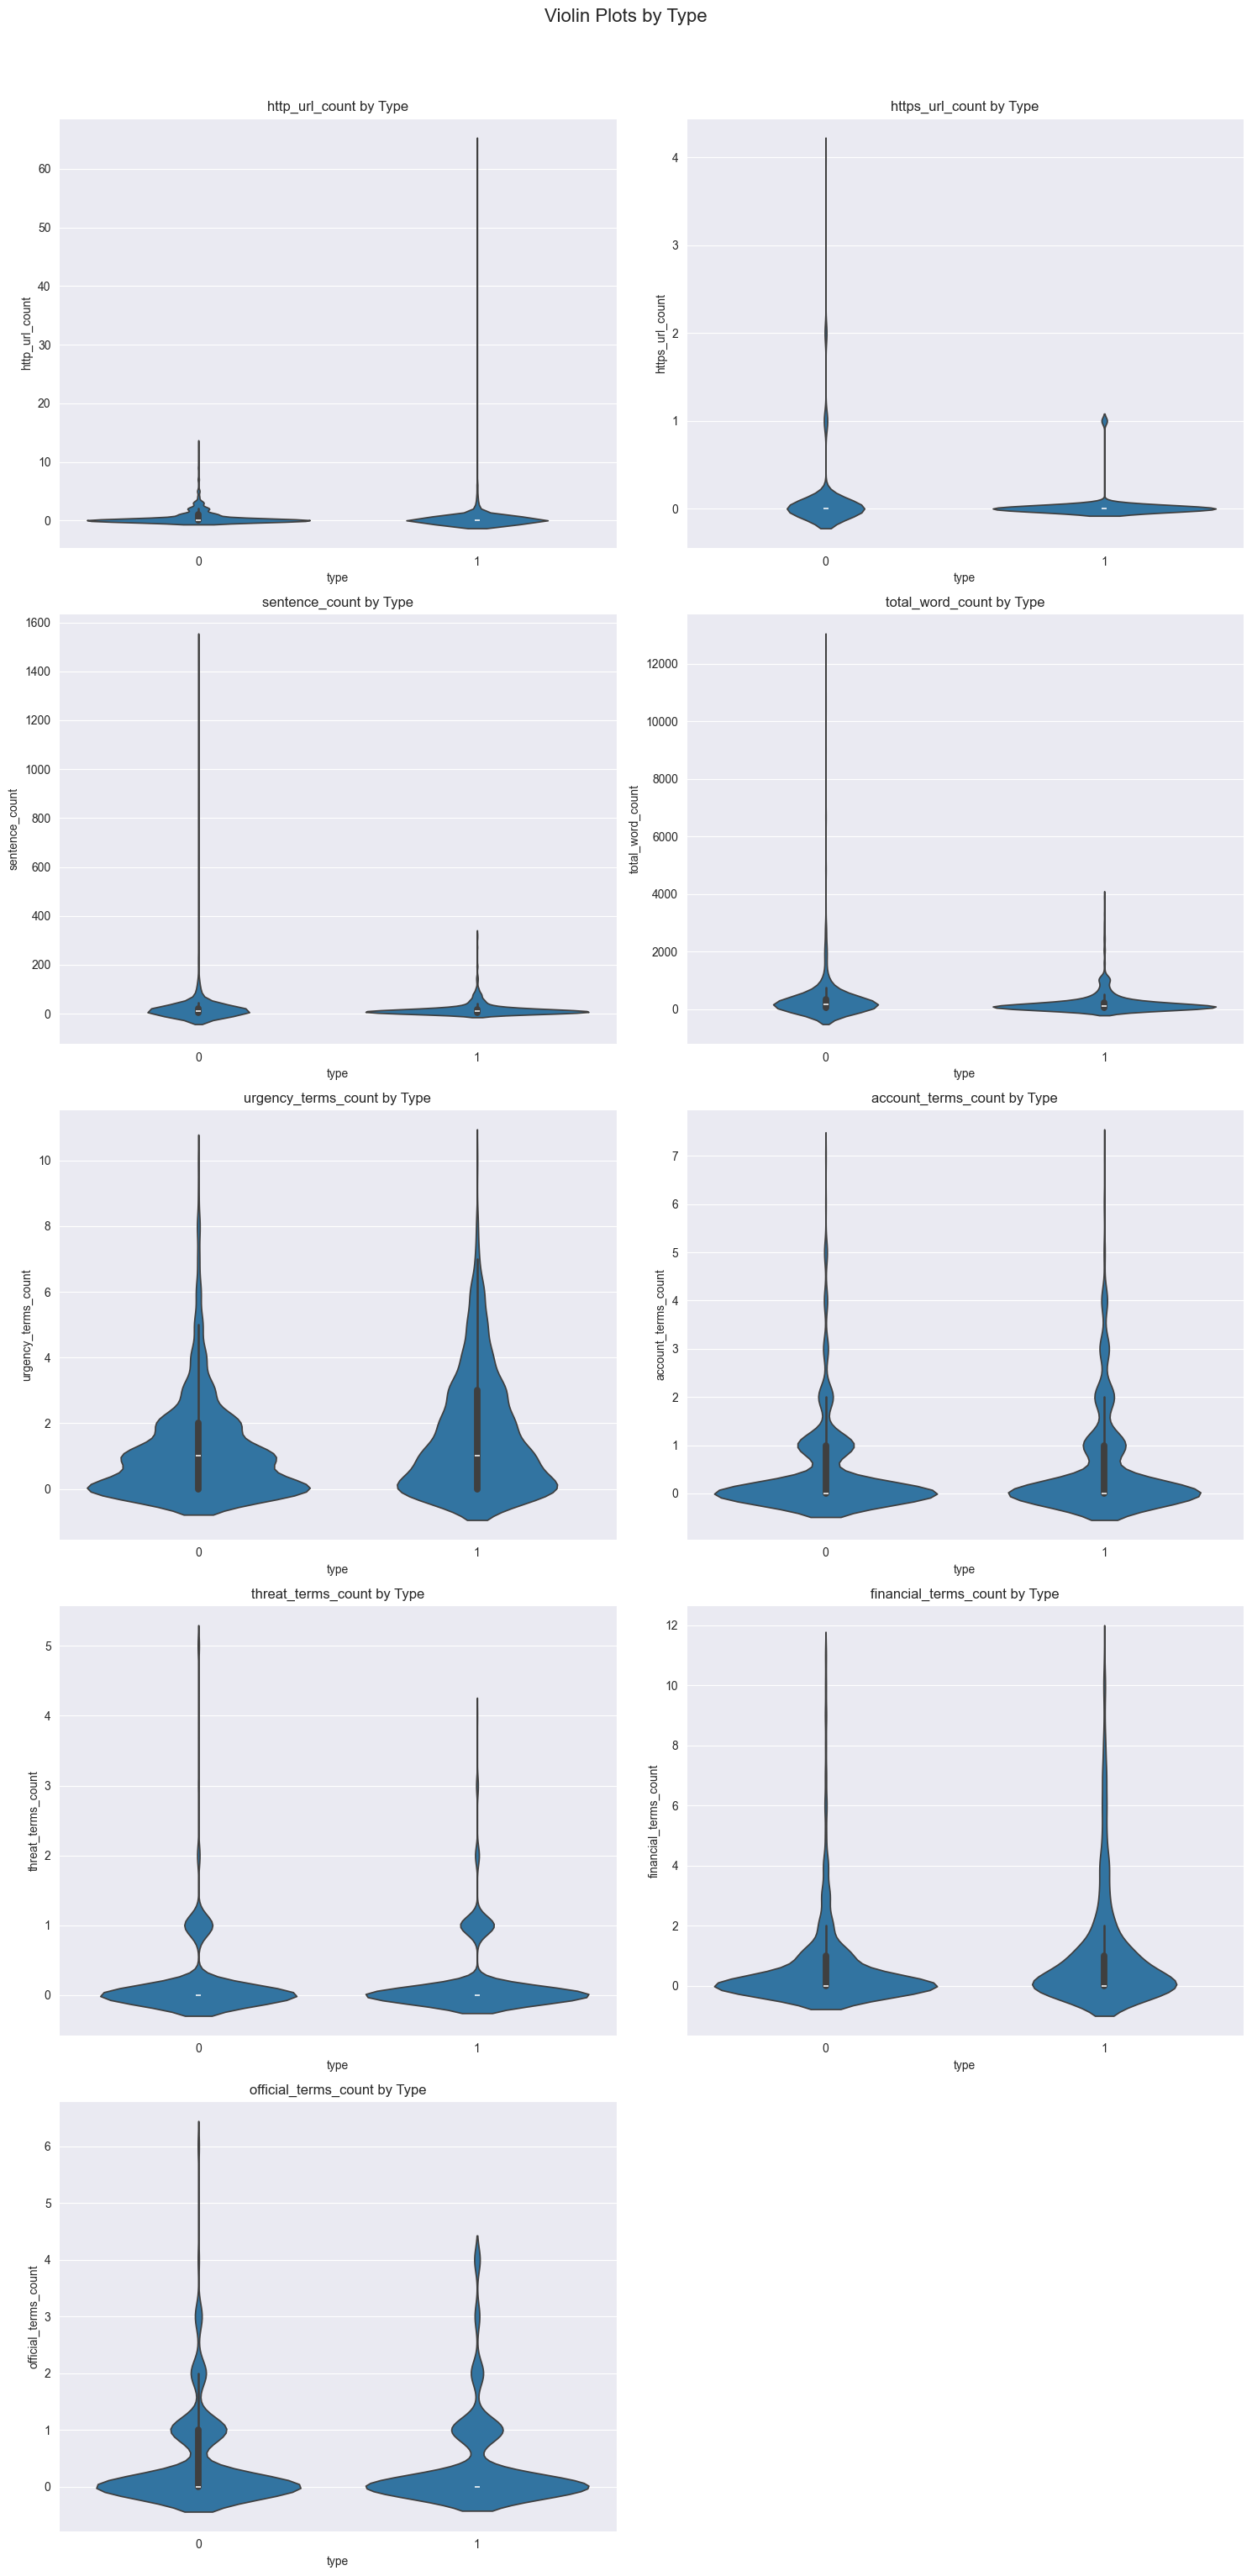

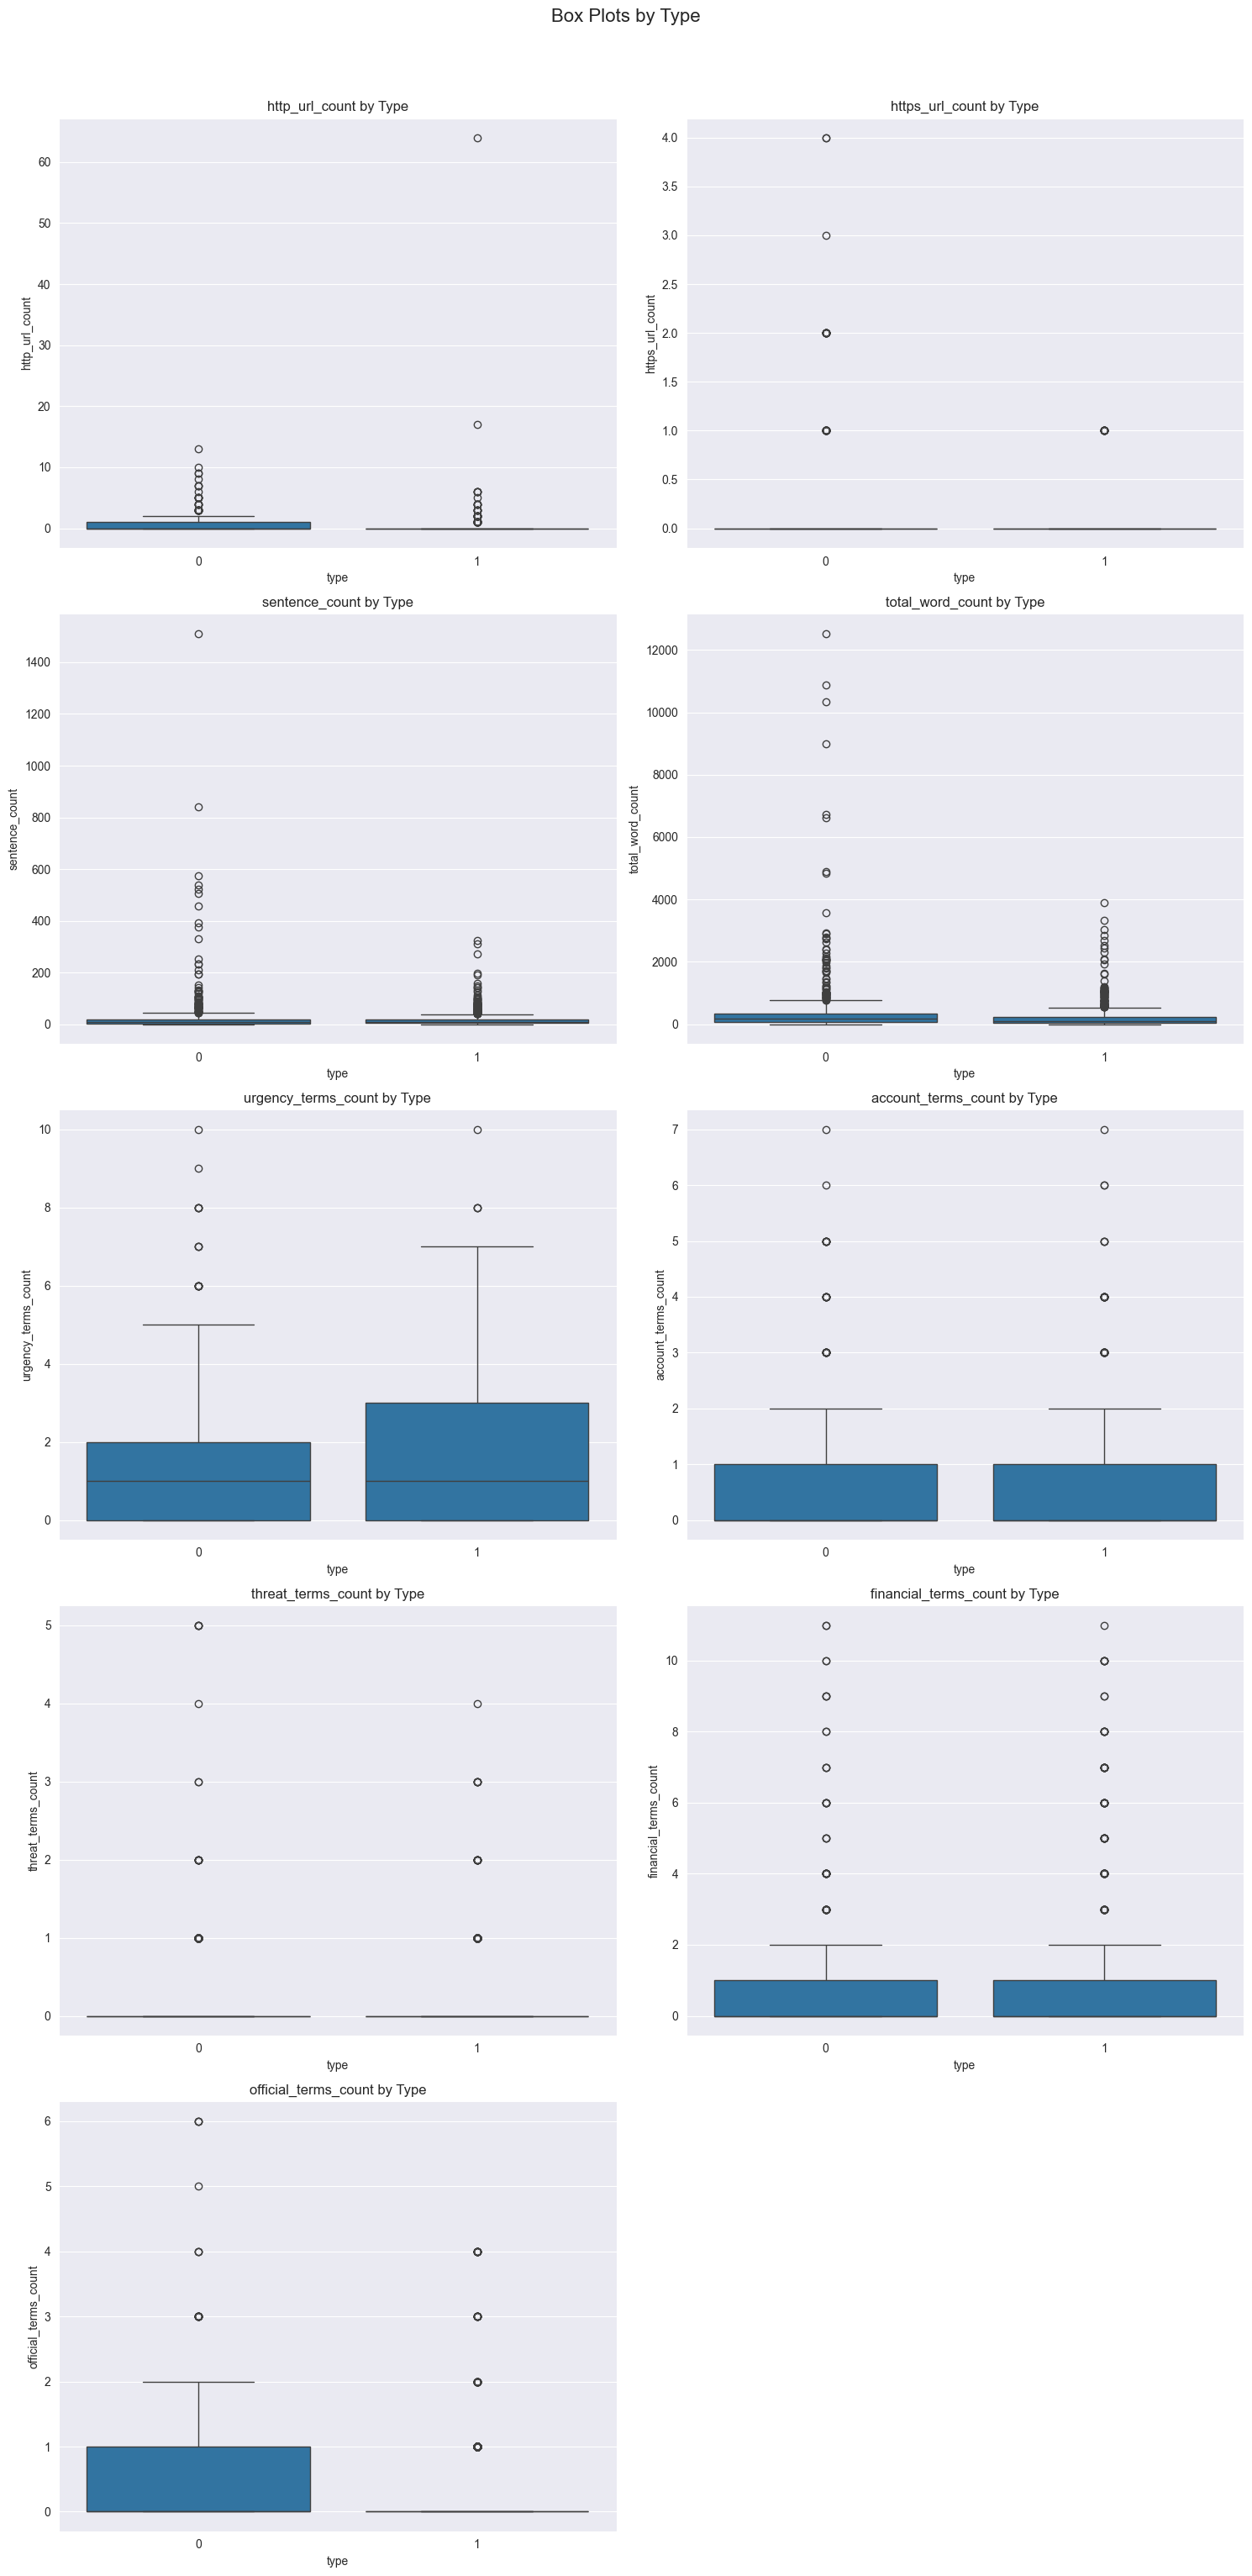

In [46]:
#generate the graphs for Biivariate analysis for the whole then use df but we will use sample
analyze_phishing_email_Bivariate_data(sampled_phishing_email_df)